<a href="https://colab.research.google.com/github/riyamandal123/AI/blob/main/NNDL_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    dW1, db1, dW2, db2 = grads['dW1'], grads['db1'], grads['dW2'], grads['db2']

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def model(X, Y, input_size, hidden_size, output_size, num_iterations=10000, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for i in range(num_iterations):

        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters


input_size = 2
hidden_size = 4
output_size = 1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

trained_parameters = model(X, Y, input_size, hidden_size, output_size, num_iterations=10000, learning_rate=0.01)

Cost after iteration 0: 0.6931471809493094
Cost after iteration 1000: 0.6931471809393078
Cost after iteration 2000: 0.6931471809347426
Cost after iteration 3000: 0.6931471809302177
Cost after iteration 4000: 0.6931471809256967
Cost after iteration 5000: 0.6931471809211798
Cost after iteration 6000: 0.6931471809166665
Cost after iteration 7000: 0.6931471809121569
Cost after iteration 8000: 0.6931471809076513
Cost after iteration 9000: 0.6931471809031492


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(input_size):
    np.random.seed(42)
    return {"W": np.random.randn(input_size, 1) * 0.01, "b": 0}

# Forward propagation
def forward_propagation(X, parameters):
    W, b = parameters["W"], parameters["b"]
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    return A

# Compute cost
def compute_cost(A, Y):
    m = Y.shape[1]
    return (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

# Model
def model(X, Y, num_iterations=10000, learning_rate=0.01):
    input_size = X.shape[0]
    parameters = initialize_parameters(input_size)
    for i in range(num_iterations):
        # Forward propagation
        A = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(A, Y)

        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return cost

# Example usage:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

cost = model(X, Y)

Cost after iteration 0: 0.6931484128347551
Cost after iteration 1000: 0.6931484128347551
Cost after iteration 2000: 0.6931484128347551
Cost after iteration 3000: 0.6931484128347551
Cost after iteration 4000: 0.6931484128347551
Cost after iteration 5000: 0.6931484128347551
Cost after iteration 6000: 0.6931484128347551
Cost after iteration 7000: 0.6931484128347551
Cost after iteration 8000: 0.6931484128347551
Cost after iteration 9000: 0.6931484128347551


In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters():
    np.random.seed(42)
    W1 = np.random.randn(2, 2) * 0.01
    b1 = np.zeros((2, 1))
    W2 = np.random.randn(1, 2) * 0.01
    b2 = np.zeros((1, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters.values()
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1, A2

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return cost

def backward_propagation(X, Y, A1, A2, parameters):
    m = X.shape[1]
    W2 = parameters['W2']
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, grads, learning_rate=0.01):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads[f'd{key}']
    return parameters

def model(X, Y, num_iterations=1000, learning_rate=0.01):
    parameters = initialize_parameters()
    for i in range(num_iterations):
        A1, A2 = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, A1, A2, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
    return parameters

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

trained_parameters = model(X, Y)
print("Trained Parameters:")
print(trained_parameters)


Trained Parameters:
{'W1': array([[ 0.00496711, -0.00138275],
       [ 0.00647556,  0.01522952]]), 'b1': array([[-2.33841897e-08],
       [-6.40102036e-07]]), 'W2': array([[-0.00234146, -0.00233798]]), 'b2': array([[2.71569643e-05]])}


exp2-planar classification

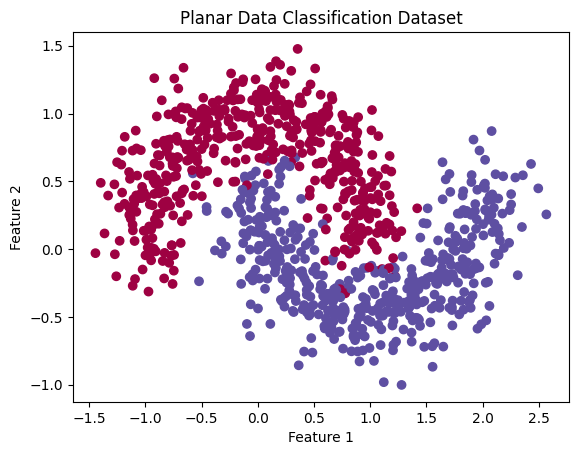

Epoch 0, Loss: 0.6930550390965977
Epoch 100, Loss: 0.2924930903058835
Epoch 200, Loss: 0.29042875744402996
Epoch 300, Loss: 0.289422067147349
Epoch 400, Loss: 0.28885430861470934
Epoch 500, Loss: 0.2884872727135154
Epoch 600, Loss: 0.28822333366098135
Epoch 700, Loss: 0.2880192373278429
Epoch 800, Loss: 0.28785388369114756
Epoch 900, Loss: 0.2877157646786994


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def forward_propagation(self, X):
        # Forward pass
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward_propagation(self, X, Y):
        m = X.shape[1]

        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        self.W2 -= dW2
        self.b2 -= db2
        self.W1 -= dW1
        self.b1 -= db1

    def train(self, X, Y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
        # Forward propagation
            predictions = self.forward_propagation(X)

        # Compute cross-entropy loss
            loss = self.cross_entropy_loss(Y, predictions)

            # Backward propagation
            self.backward_propagation(X, Y)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def cross_entropy_loss(self, Y, A):
        m = Y.shape[1]  # Number of samples
        return -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

# Load and preprocess the data
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T
Y = Y.reshape(1, -1)

# Plot the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification Dataset')
plt.show()

# Example usage
input_size = 2
hidden_size = 4
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X, Y, num_epochs=1000, learning_rate=0.01)



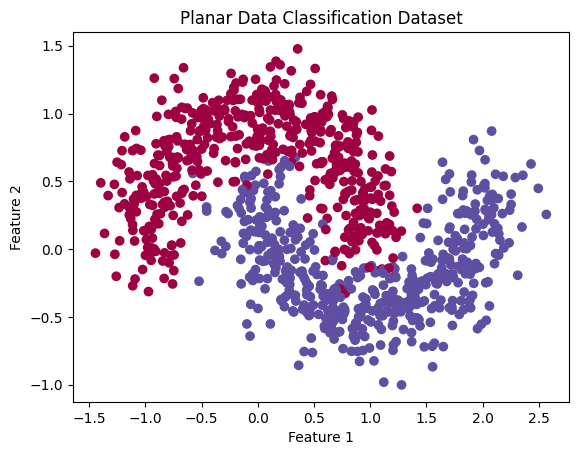

Epoch 0, Loss: 0.6929294466972351
Epoch 100, Loss: 0.30950212478637695
Epoch 200, Loss: 0.2900722920894623
Epoch 300, Loss: 0.2900533378124237
Epoch 400, Loss: 0.2900254726409912
Epoch 500, Loss: 0.28999456763267517
Epoch 600, Loss: 0.2899637520313263
Epoch 700, Loss: 0.2899340093135834
Epoch 800, Loss: 0.28990569710731506
Epoch 900, Loss: 0.2898787260055542


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize parameters
        self.W1 = tf.Variable(tf.random.normal([hidden_size, input_size], stddev=0.01))
        self.b1 = tf.Variable(tf.zeros([hidden_size, 1]))
        self.W2 = tf.Variable(tf.random.normal([output_size, hidden_size], stddev=0.01))
        self.b2 = tf.Variable(tf.zeros([output_size, 1]))

    def forward_propagation(self, X):
        # Forward pass
        Z1 = tf.matmul(self.W1, X) + self.b1
        A1 = tf.nn.tanh(Z1)
        Z2 = tf.matmul(self.W2, A1) + self.b2
        A2 = tf.nn.sigmoid(Z2)
        return A2

    def backward_propagation(self, X, Y, learning_rate):
        with tf.GradientTape() as tape:
            predictions = self.forward_propagation(X)
            loss = self.cross_entropy_loss(Y, predictions)

        gradients = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        optimizer.apply_gradients(zip(gradients, [self.W1, self.b1, self.W2, self.b2]))

    def train(self, X, Y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            self.backward_propagation(X, Y, learning_rate)

            if epoch % 100 == 0:
                predictions = self.forward_propagation(X)
                loss = self.cross_entropy_loss(Y, predictions)
                print(f'Epoch {epoch}, Loss: {loss}')

    def cross_entropy_loss(self, Y, A):
        m = Y.shape[1]
        loss = -tf.reduce_mean(Y * tf.math.log(A) + (1 - Y) * tf.math.log(1 - A))
        return loss

# Load and preprocess the data
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T.astype(np.float32)
Y = Y.reshape(1, -1).astype(np.float32)

# Plot the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification Dataset')
plt.show()

# Example usage
input_size = 2
hidden_size = 4
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X, Y, num_epochs=1000, learning_rate=0.01)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2992 - accuracy: 0.9136 - val_loss: 0.1237 - val_accuracy: 0.9657
Epoch 2/5
844/844 [==============================] - 5s 6ms/step - loss: 0.1271 - accuracy: 0.9620 - val_loss: 0.1075 - val_accuracy: 0.9708
Epoch 3/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0866 - accuracy: 0.9735 - val_loss: 0.0886 - val_accuracy: 0.9730
Epoch 4/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9782
Test accuracy: 0.9782000184059143
1/1 [==============================] - 0s 102ms/step


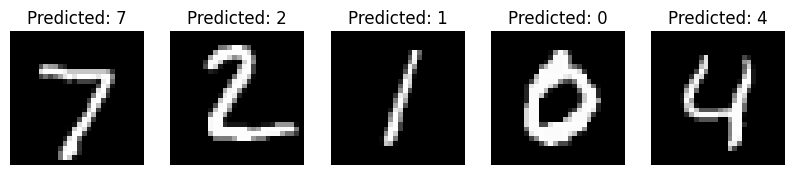

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Define the NeuralNetwork class
class NeuralNetwork:
    def __init__(self, input_shape, num_classes):
        self.model = self.build_model(input_shape, num_classes)
    def build_model(self, input_shape, num_classes):
        model = models.Sequential()
        model.add(layers.Flatten(input_shape=input_shape))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def train(self, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1):
        history = self.model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
        return history
    def evaluate(self, test_images, test_labels):
        return self.model.evaluate(test_images, test_labels)
    def predict(self, images):
        return self.model.predict(images)
# Create an instance of the NeuralNetwork class
input_shape = (28, 28, 1)
num_classes = 10
nn = NeuralNetwork(input_shape, num_classes)
# Train the neural network
history = nn.train(train_images, train_labels, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions on a few test images
predictions = nn.predict(test_images[:5])

# Plot the first few test images and their predicted labels
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define helper functions

def create_convolutional_layer(filters, kernel_size, activation='relu', input_shape=None):


    if input_shape:
        return layers.Conv2D(filters, kernel_size, activation=activation, input_shape=input_shape)
    else:
        return layers.Conv2D(filters, kernel_size, activation=activation)

def create_maxpooling_layer(pool_size=(2, 2)):
    return layers.MaxPooling2D(pool_size)

def create_dense_layer(units, activation='relu'):
    return layers.Dense(units, activation=activation)

# Build ConvNet modelm

def build_convnet(input_shape, num_classes):

    model = models.Sequential()

    # Convolutional layers
    model.add(create_convolutional_layer(32, (3, 3), input_shape=input_shape))
    model.add(create_maxpooling_layer())
    model.add(create_convolutional_layer(64, (3, 3)))
    model.add(create_maxpooling_layer())

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layers
    model.add(create_dense_layer(128))
    model.add(create_dense_layer(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Load dataset (Fashion MNIST as an example)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build and train the model
input_shape = (28, 28, 1)
num_classes = 10
model = build_convnet(input_shape, num_classes)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4484 - accuracy: 0.8365 - val_loss: 0.3481 - val_accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3037 - accuracy: 0.8880 - val_loss: 0.2995 - val_accuracy: 0.8910
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2563 - accuracy: 0.9054 - val_loss: 0.2762 - val_accuracy: 0.9006
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2251 - accuracy: 0.9162 - val_loss: 0.2569 - val_accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1996 - accuracy: 0.9262 - val_loss: 0.2671 - val_accuracy: 0.9070
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1770 - accuracy: 0.9339 - val_loss: 0.2583 - val_accuracy: 0.9120
Epoch 7/10
1875/1875 [==============================] - 50s 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
max_len = 500  # Maximum sequence length
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Pad sequences to have consistent length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Build RNN model

model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_train, y_train,
          epochs=10,
          batch_size=batch_size,
          validation_split=0.2)

# Evaluate the model
score, acc = model.evaluate(input_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
625/625 [==============================] - 68s 106ms/step - loss: 0.5591 - accuracy: 0.7018 - val_loss: 0.4373 - val_accuracy: 0.8066
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3681 - accuracy: 0.8429 - val_loss: 0.3793 - val_accuracy: 0.8380
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3037 - accuracy: 0.8781 - val_loss: 0.3518 - val_accuracy: 0.8614
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2545 - accuracy: 0.9007 - val_loss: 0.3705 - val_accuracy: 0.8496
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2210 - accuracy: 0.9150 - val_loss: 0.4375 - val_accuracy: 0.8516
Epoch 6/10
625/625 [==============================] - 67s

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 42s 54ms/step - loss: 0.2043 - accuracy: 0.9378 - val_loss: 0.0722 - val_accuracy: 0.9791
Epoch 2/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0485 - val_accuracy: 0.9855
Epoch 4/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0416 - val_accuracy: 0.9878
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0287 - accuracy: 0.9914
Test accuracy: 0.9914000034332275
1/1 [==============================] - 0s 117ms/step


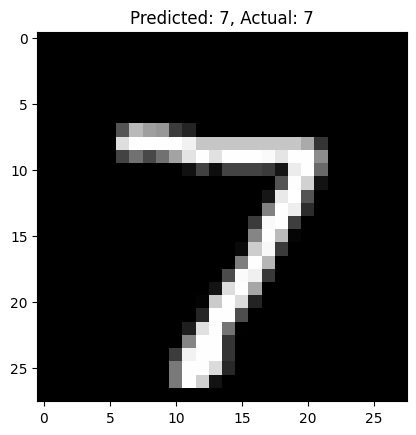

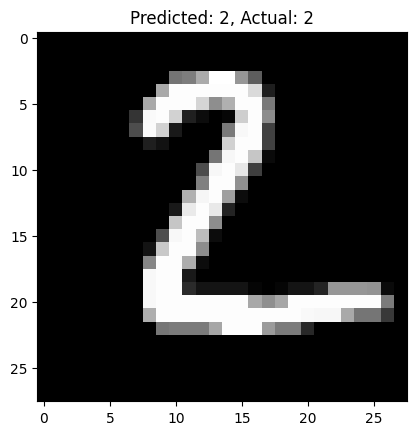

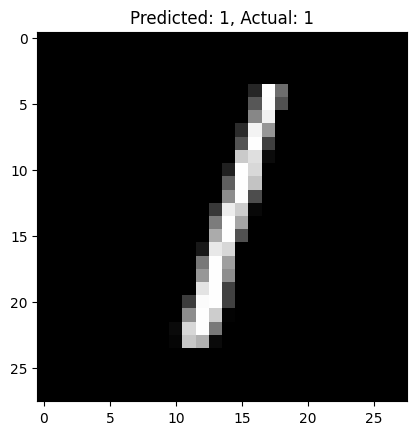

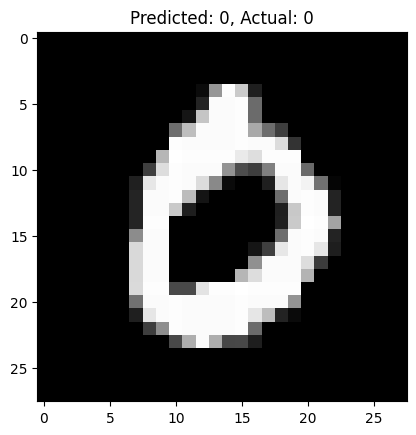

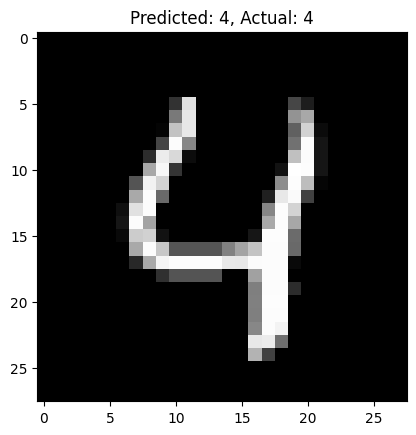

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Define the deep neural network architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
# Make predictions on a few test images
predictions = model.predict(test_images[:5])
# Display the test images and their predicted labels
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}, Actual: {tf.argmax(test_labels[i])}')
    plt.show()
